# Explore with Pandas

In [1]:
import pandas as pd
import os
import pandera as pa
import glob
import matplotlib.pyplot as plt

display(pd.__version__)

from cell_profiler import cell_profiler as cp
%start_cell_profiler

'2.0.1'

'Profiling enabled'

In [1] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 203.5 MiB


In [2]:
import os
import glob

DATA_FOLDER = '/home/ian/workspace/data/anonymised_mot_tests'
DATA_FOLDER = os.path.join(DATA_FOLDER, 'test_result_2021')
#DATA_FOLDER

files = glob.glob(DATA_FOLDER+"/test_result_*.csv")
DATA_FOLDER, files

('/home/ian/workspace/data/anonymised_mot_tests/test_result_2021',
 ['/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32355.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32361.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32372.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32367.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32365.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32386.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32357.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32378.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_

In [2] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 203.5 MiB


In [3]:
#filename = 'test_result_2021/test_result_20220531131730_32355.csv'
dfs = []
for filename in files:
    #filename = files[0]
    print(f"Loading {filename}")
    df = pd.read_csv(filename)
    dfs.append(df)

Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32355.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32361.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32372.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32367.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32365.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32386.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32357.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32378.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32370.csv
Loading /home/ian/workspace/

In [4]:
df = pd.concat(dfs)

In [4] used 4899.5 MiB RAM in 24.24s (system mean cpu 9%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 9809.2 MiB


In [5]:
# seem to need to run this after concat, as before columns get de-categorised
cat_cols = ['test_class_id', 'test_type', 'test_result', 'postcode_area', 'make', 'model', 'colour', 'fuel_type']
for cat_col in cat_cols:
    df[cat_col] = df[cat_col].astype('category')

In [5] used -1969.2 MiB RAM in 16.11s (system mean cpu 8%, single max cpu 100%), peaked 2581.4 MiB above final usage, current RAM usage now 7840.0 MiB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40380646 entries, 0 to 3363312
Data columns (total 14 columns):
 #   Column             Dtype   
---  ------             -----   
 0   test_id            int64   
 1   vehicle_id         int64   
 2   test_date          object  
 3   test_class_id      category
 4   test_type          category
 5   test_result        category
 6   test_mileage       float64 
 7   postcode_area      category
 8   make               category
 9   model              category
 10  colour             category
 11  fuel_type          category
 12  cylinder_capacity  float64 
 13  first_use_date     object  
dtypes: category(8), float64(2), int64(2), object(2)
memory usage: 2.6+ GB
In [6] used 1.5 MiB RAM in 0.13s (system mean cpu 3%, single max cpu 27%), peaked 0.0 MiB above final usage, current RAM usage now 7841.5 MiB


In [7]:
df['first_use_date_raw'] = df['first_use_date']
df['first_use_date'] = pd.to_datetime(df['first_use_date_raw'], errors='coerce')
#OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 4-02-20 00:00:00, at position 904021. You might want to try:
#    - passing `format` if your strings have a consistent format;
#    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
#    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7] used 309.3 MiB RAM in 5.08s (system mean cpu 9%, single max cpu 100%), peaked 616.0 MiB above final usage, current RAM usage now 8150.7 MiB


In [8]:
df['test_date_raw'] = df['test_date']
df['test_date'] = pd.to_datetime(df['test_date_raw'], errors='coerce')

In [8] used 308.2 MiB RAM in 5.68s (system mean cpu 5%, single max cpu 100%), peaked 612.9 MiB above final usage, current RAM usage now 8459.0 MiB


In [9]:
from pandera import DataFrameSchema, Column, Check, Index, MultiIndex
from pandera.errors import SchemaErrors

VALID_TEST_RESULT = set(['P', 'F', 'PRS', 'ABR', 'ABA', 'ABRVE'])
VALID_TEST_TYPE = set(['NT', 'RT', 'ES'])
VALID_COLOUR = set(['BLACK', 'WHITE', 'SILVER', 'BLUE', 'GREY', 'RED', 'GREEN', 'ORANGE', 'YELLOW', 'BEIGE', \
                   'BROWN', 'PURPLE', 'GOLD', 'BRONZE', 'MAROON','TURQUOISE', 'CREAM', 'PINK', 'MULTI-COLOUR', 'NOT STATED'])
VALID_FUEL_TYPE = set(['PE', 'DI', 'HY', 'EL', 'OT', 'LP', 'ED', 'GB', 'FC', 'CN', 'GA', 'GD','ST', 'LN'])

# by default Column has nullable, coerce, unique, refex == False
# title is not needed nor description

# other checks?
# test_mileage 5th percentile > xxx as most should be "sensible"
# postcode_area xx very rare
# cylinder_capacity typically more than ...
# first_use_date > ... something reasonable


schema = DataFrameSchema(
    columns={
        "test_id": Column(
            dtype="int64",
            checks=[
                #Check.greater_than_or_equal_to(min_value=31563.0),
                #Check.less_than_or_equal_to(max_value=1999897323.0),
            ],
        ),
        "vehicle_id": Column(
            dtype="int64",
            checks=[
                #Check.greater_than_or_equal_to(min_value=108275.0),
                #Check.less_than_or_equal_to(max_value=1499704119.0),
            ],
        ),
        "test_date": Column(
            dtype="datetime",
            coerce=False
        ),
        "test_class_id": Column(
            dtype="category",
            checks=[
                # WHAT'S A GOOD RANGE?
                #Check.greater_than_or_equal_to(min_value=1.0),
                #Check.less_than_or_equal_to(max_value=7.0),
            ],
        ),
        "test_type": Column(
            dtype="category",
            checks=[pa.Check(lambda s: s.isin(VALID_TEST_TYPE))],
        ),
        "test_result": Column(
            dtype="category",
            checks=[Check(lambda s: s.isin(VALID_TEST_RESULT)),
                    # we normally see 75% pass rate, so test >60%
                    Check(lambda ser: ((ser == 'P').sum() / ser.size) > 0.6)],
        ),
        "test_mileage": Column(
            dtype="float64",
            checks=[
                # we do get 1-10 miles on the clock!
                Check.greater_than_or_equal_to(min_value=1.0),
                Check.less_than_or_equal_to(max_value=999999.0),
            ],
            nullable=True,
        ),
        "postcode_area": Column(
            dtype="category",
            checks=None,
        ),
        "make": Column(
            dtype="category",
            nullable=True,
            checks=[pa.Check(lambda ser: ser.isnull().sum() <= 5)]
        ),
        "model": Column(
            dtype="category",
            nullable=True
        ),
        "colour": Column(
            dtype="category",
            checks=[pa.Check(lambda s: s.isin(VALID_COLOUR))],
        ),
        "fuel_type": Column(
            dtype="category",
            checks=[Check(lambda s: s.isin(VALID_FUEL_TYPE))],
        ),
        "cylinder_capacity": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=0.0),
                Check.less_than_or_equal_to(max_value=99999.0),
                # TODO added percentile check
            ],
            nullable=True,
        ),
        "first_use_date": Column(
            dtype="datetime",
            nullable=True
        ),
    },
    checks=None,
    index=Index(
        dtype="int64",
        checks=[
            #Check.greater_than_or_equal_to(min_value=1030.0),
            #Check.less_than_or_equal_to(max_value=3362152.0),
        ],
    ),
    dtype=None,
    coerce=False,
    strict=False,
    name=None,
    ordered=False,
    unique=None,
    report_duplicates="all",
    unique_column_names=False,
    title=None,
    description=None,
)

try:
    schema.validate(df, lazy=True) # RESTRICTED
except SchemaErrors as err:
    print(err.failure_cases)  # dataframe of schema errors
    print(err.data)  # invalid dataframe


In [9] used 2925.9 MiB RAM in 14.70s (system mean cpu 9%, single max cpu 100%), peaked 1762.1 MiB above final usage, current RAM usage now 11384.9 MiB


# Plot first use year vs mileage

In [10]:
df_sample = df.sample(1_000)
dfx = df_sample[['test_mileage', 'first_use_date']].copy()
dfx = dfx.dropna()
dfx

,test_mileage,first_use_date
189913,28304.0,2015-03-27
2330509,66123.0,2012-04-11
3158612,95244.0,2010-09-25
1398104,72016.0,2006-06-24
764759,32629.0,2016-04-30
...,...,...
1938375,78917.0,2008-05-20
563783,36652.0,2013-03-01
1612421,34122.0,2017-12-11
784275,147675.0,2005-01-31


In [10] used 0.3 MiB RAM in 1.39s (system mean cpu 7%, single max cpu 100%), peaked 160.0 MiB above final usage, current RAM usage now 11385.2 MiB


In [11]:
# https://github.com/ianozsvald/notes_to_self/blob/master/simpler_mpl.py

def set_common_mpl_styles(
    ax,
    legend=True,
    grid_axis="y",
    ylabel=None,
    xlabel=None,
    title=None,
    ymin=None,
    xmin=None,
):
    """Nice common plot configuration
    We might use it via `fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 6))`
    """
    if grid_axis is not None:
        # depending on major/minor grid frequency we might
        # need the simpler form
        # ax.grid(axis=grid_axis)
        ax.grid(visible=True, which="both", axis=grid_axis)
    #if legend is False: # CHANGED
    #    ax.legend_.remove()
    #else:
    #    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if title is not None:
        ax.set_title(title)
    if ymin is not None:
        ax.set_ylim(ymin=ymin)
    if xmin is not None:
        ax.set_xlim(xmin=xmin)


def rotate_labels(x_axis=False, y_axis=False, rotation=-90):
    if x_axis:
        plt.xticks(rotation=rotation)
    if y_axis:
        plt.yticks(rotation=rotation)


def set_commas(ax, x_axis=False, y_axis=False):
    # NOTE this may not work well e.g. on bar plots
    # in which case make a df_to_plot where index has been
    # reset, turned with string formatting into good result,
    # then index has been set again
    texts = []
    if x_axis:
        ticks = ax.get_xticks()
        tick_labels = ax.get_xticklabels()
        for label in tick_labels:
            text = label.get_text()
            texts.append(f"{int(text):,}")
        plt.xticks(ticks=ticks, labels=texts)
    if y_axis:
        ticks = ax.get_yticks()
        tick_labels = ax.get_yticklabels()
        for label in tick_labels:
            text = label.get_text()
            text = text.replace('−', '-') # CHANGED
            texts.append(f"{int(text):,}")
        plt.yticks(ticks=ticks, labels=texts)

In [11] used 0.0 MiB RAM in 0.10s (system mean cpu 3%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 11385.2 MiB


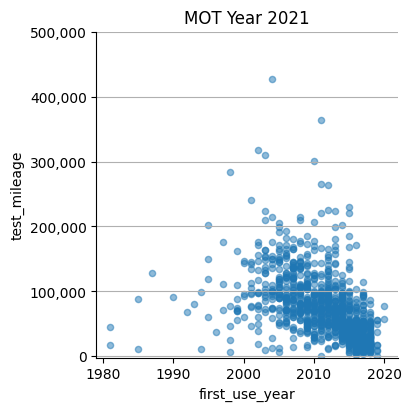

In [12] used -2925.5 MiB RAM in 0.41s (system mean cpu 12%, single max cpu 100%), peaked 2925.6 MiB above final usage, current RAM usage now 8459.6 MiB


In [12]:
dfx['first_use_year'] = dfx['first_use_date'].dt.year
#dfx = dfx.set_index('first_use_year')

fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 4))
dfx.plot(kind='scatter', x='first_use_year', y='test_mileage', alpha=0.5, ax=ax)
set_commas(ax, y_axis=True)
set_common_mpl_styles(ax, ymin=-2000, title="MOT Year 2021")

(-2000.0, 400000.0)

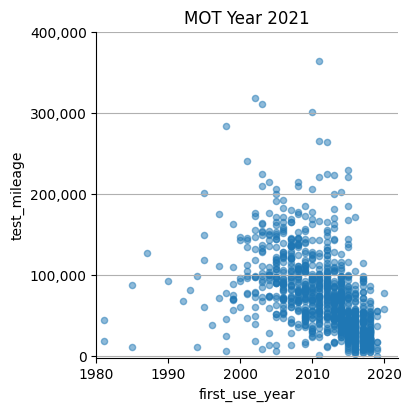

In [13] used 1.4 MiB RAM in 0.20s (system mean cpu 11%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 8461.0 MiB


In [13]:
dfx['first_use_year'] = dfx['first_use_date'].dt.year
#dfx = dfx.set_index('first_use_year')

fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 4))
dfx.plot(kind='scatter', x='first_use_year', y='test_mileage', alpha=0.5, ax=ax)
set_commas(ax, y_axis=True)
set_common_mpl_styles(ax, ymin=-2000, title="MOT Year 2021")
ax.set_xlim(xmin=1980)
ax.set_ylim(ymax=400000)

# quick hack to look in to the volvo and passat

In [14]:
df['first_use_year'] = df['first_use_date'].dt.year


In [14] used 308.2 MiB RAM in 1.54s (system mean cpu 7%, single max cpu 100%), peaked 280.1 MiB above final usage, current RAM usage now 8769.2 MiB


In [15]:
# https://www.ebay.co.uk/itm/166050536198
df.query('make=="VOLVO" and model=="V50" and fuel_type=="DI" \
and test_result=="P" and first_use_year==2005')['test_mileage'].describe()

count      1893.000000
mean     147694.984680
std       38235.841446
min       11697.000000
25%      123573.000000
50%      147722.000000
75%      172023.000000
max      339348.000000
Name: test_mileage, dtype: float64

In [15] used 0.2 MiB RAM in 0.35s (system mean cpu 6%, single max cpu 100%), peaked 803.1 MiB above final usage, current RAM usage now 8769.4 MiB


In [16]:
# https://www.facebook.com/marketplace/item/956054899045224/

df.query('make=="VOLKSWAGEN" and model=="PASSAT" and fuel_type=="PE" \
and test_result=="P" and first_use_year==1999')['test_mileage'].describe()

count       330.000000
mean     128494.012121
std       48560.709765
min       21820.000000
25%       95334.500000
50%      125398.500000
75%      157700.750000
max      380196.000000
Name: test_mileage, dtype: float64

In [16] used 0.3 MiB RAM in 0.37s (system mean cpu 7%, single max cpu 100%), peaked 799.0 MiB above final usage, current RAM usage now 8769.7 MiB


In [17]:
df.query('vehicle_id==223981155') # odd vehicle with many tests

,test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,first_use_date_raw,test_date_raw,first_use_year
824,1706850163,223981155,2021-01-02,4,NT,P,42266.0,HA,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-01-02,2018.0
41899,1734866957,223981155,2021-01-06,4,NT,P,222386.0,HA,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-01-06,2018.0
43840,489399713,223981155,2021-01-07,4,NT,P,139274.0,SW,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-01-07,2018.0
69039,607759733,223981155,2021-01-08,4,NT,P,126534.0,NE,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-01-08,2018.0
101300,766470403,223981155,2021-01-12,4,NT,P,135601.0,GU,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-01-12,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271108,151812247,223981155,2021-12-16,4,NT,P,126552.0,BS,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-12-16,2018.0
3282455,1683024215,223981155,2021-12-16,4,NT,P,176252.0,BS,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-12-16,2018.0
3285463,1746155461,223981155,2021-12-17,4,NT,P,75246.0,BS,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-12-17,2018.0
3286503,456646913,223981155,2021-12-17,4,NT,P,93721.0,BS,DVSA,DVSA,BEIGE,OT,999.0,2018-09-27,2018-09-27,2021-12-17,2018.0


In [17] used -0.1 MiB RAM in 0.22s (system mean cpu 7%, single max cpu 100%), peaked 651.3 MiB above final usage, current RAM usage now 8769.6 MiB


In [18]:
df.query('fuel_type=="ST"')

,test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,first_use_date_raw,test_date_raw,first_use_year
452456,1307186595,1083372856,2021-02-16,4,RT,P,96652.0,FY,VAUXHALL,MERIVA,BLUE,ST,1248.0,2008-12-31,2008-12-31,2021-02-16,2008.0
1451947,24577045,485557816,2021-06-22,4,NT,P,78818.0,EX,PEUGEOT,207,GREY,ST,1560.0,2008-09-30,2008-09-30,2021-06-22,2008.0
1840367,1195577575,48321314,2021-08-06,4,NT,P,39235.0,LE,TOYOTA,YARIS,GREY,ST,1296.0,2008-08-30,2008-08-30,2021-08-06,2008.0
1905037,332627001,874680106,2021-08-13,4,NT,P,168901.0,DN,BMW,120,BLACK,ST,1995.0,2006-06-01,2006-06-01,2021-08-13,2006.0
2975568,1897781693,784485008,2021-11-17,4,NT,P,179984.0,LN,LAND ROVER,DEFENDER,BLACK,ST,2700.0,1986-09-24,1986-09-24,2021-11-17,1986.0
3059451,1262466405,1057579754,2021-11-25,4,NT,P,123034.0,IG,AUDI,A4,BLACK,ST,1896.0,2005-03-22,2005-03-22,2021-11-25,2005.0
406388,1993550881,652183304,2021-02-11,4,NT,P,48195.0,KT,NISSAN,MICRA,SILVER,ST,1275.0,1999-03-09,1999-03-09,2021-02-11,1999.0
3126898,97946893,264426052,2021-12-01,4,NT,P,64269.0,E,TOYOTA,YARIS,BLACK,ST,NaN,2006-01-30,2006-01-30,2021-12-01,2006.0
161328,1448375005,196052418,2021-01-18,4,NT,P,78569.0,BD,RENAULT,GRAND MODUS,BLACK,ST,1461.0,2011-05-23,2011-05-23,2021-01-18,2011.0
1065404,123236443,60920724,2021-04-26,4,NT,P,48078.0,M,FORD,MONDEO,BLACK,ST,1997.0,2009-06-24,2009-06-24,2021-04-26,2009.0


In [18] used 0.5 MiB RAM in 0.26s (system mean cpu 5%, single max cpu 100%), peaked 661.8 MiB above final usage, current RAM usage now 8770.2 MiB


In [19]:
df['test_class_id'].value_counts(dropna=False)
# 4 is car, 7 is truck, 1-2 bike, 3 3 wheeled vehicle, 5 private passenger

test_class_id
4    38155866
7     1124181
2      789078
1      249165
5       51510
3       10846
Name: count, dtype: int64

In [19] used 0.1 MiB RAM in 0.24s (system mean cpu 4%, single max cpu 100%), peaked 346.4 MiB above final usage, current RAM usage now 8770.3 MiB
